In [1]:
import requests
import json
import prettytable
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['CUUR0000SA0','SUUR0000SA0'],"startyear":"2011",\
    "endyear":"2025"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)
for series in json_data['Results']['series']:
    x=prettytable.PrettyTable(["series id","year","period","value","footnotes"])
    seriesId = series['seriesID']
    for item in series['data']:
        year = item['year']
        period = item['period']
        value = item['value']
        footnotes=""
        for footnote in item['footnotes']:
            if footnote:
                footnotes = footnotes + footnote['text'] + ','
        if 'M01' <= period <= 'M12':
            x.add_row([seriesId,year,period,value,footnotes[0:-1]])
    output = open(seriesId + '.txt','w')
    output.write (x.get_string())
    output.close()

KeyboardInterrupt: 

In [1]:
import requests
import json
import prettytable
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['CUUR0000SA0','SUUR0000SA0'],"startyear":"2011",\
    "endyear":"2025"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)
for series in json_data['Results']['series']:
    x=prettytable.PrettyTable(["series id","year","period","value","footnotes"])
    seriesId = series['seriesID']
    for item in series['data']:
        year = item['year']
        period = item['period']
        value = item['value']
        footnotes=""
        for footnote in item['footnotes']:
            if footnote:
                footnotes = footnotes + footnote['text'] + ','
        if 'M01' <= period <= 'M12':
            x.add_row([seriesId,year,period,value,footnotes[0:-1]])
    output = open(seriesId + '.txt','w')
    output.write (x.get_string())
    output.close()

KeyboardInterrupt: 

In [5]:
## this is the code to get the cpi data from the burearure of economic of 
# unit state

import pandas_datareader.data as web
import datetime

# Define the Date Range
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2025, 12, 30)

# Series IDs from FRED:
# CPIAUCSL = CPI (Seasonally Adjusted)
# UNRATE   = Unemployment Rate
# PCE      = Personal Consumption Expenditures (Headline PCE)
# PCEPI    = PCE Price Index (The inflation metric)

print("Fetching data from FRED...")
df = web.DataReader(['CPIAUCSL', 'UNRATE', 'PCEPI'], 'fred', start, end)

# Display the data
print(df.tail())

# Save to CSV
df.to_csv('economic_data.csv')
print("Saved to economic_data.csv")

Fetching data from FRED...
            CPIAUCSL  UNRATE    PCEPI
DATE                                 
2025-07-01   322.132     4.2  126.955
2025-08-01   323.364     4.3  127.283
2025-09-01   324.368     4.4  127.625
2025-10-01       NaN     NaN      NaN
2025-11-01   325.031     4.6      NaN
Saved to economic_data.csv


In [ ]:
# this code is to get the data from the minister of labour and save the file in txt file 

import requests
import json
import prettytable

headers = {'Content-type': 'application/json'}

# SERIES IDS EXPLAINED:
# CUUR0000SA0 = CPI-U (All items, not seasonally adjusted) - This was in your original code
# LNS14000000 = Unemployment Rate (Seasonally Adjusted) - The standard "Headline" rate
data = json.dumps({
    "seriesid": ['CUUR0000SA0', 'LNS14000000'],
    "startyear": "2022",  # Updated to recent years
    "endyear": "2025"
})

p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)

# Check if the request was successful
if json_data['status'] == 'REQUEST_SUCCEEDED':
    for series in json_data['Results']['series']:
        x = prettytable.PrettyTable(["series id", "year", "period", "value", "footnotes"])
        seriesId = series['seriesID']
        
        # Add a friendly name for the file
        series_name = "Unknown"
        if seriesId == 'CUUR0000SA0':
            series_name = "CPI_Data"
        elif seriesId == 'LNS14000000':
            series_name = "Unemployment_Rate"
            
        print(f"Processing {series_name} ({seriesId})...")

        for item in series['data']:
            year = item['year']
            period = item['period']
            value = item['value']
            footnotes = ""
            for footnote in item['footnotes']:
                if footnote:
                    footnotes = footnotes + footnote['text'] + ','
            
            # Filter for Monthly data (M01-M12)
            if 'M01' <= period <= 'M12':
                x.add_row([seriesId, year, period, value, footnotes[0:-1]])
        
        # Write to a named file
        filename = f"{series_name}.txt"
        with open(filename, 'w') as output:
            output.write(x.get_string())
        print(f"Saved data to {filename}")
else:
    print("Request Failed:", json_data['message'])

Processing CPI_Data (CUUR0000SA0)...
Saved data to CPI_Data.txt
Processing Unemployment_Rate (LNS14000000)...
Saved data to Unemployment_Rate.txt


## data that Bureau of Labour Statistic ##

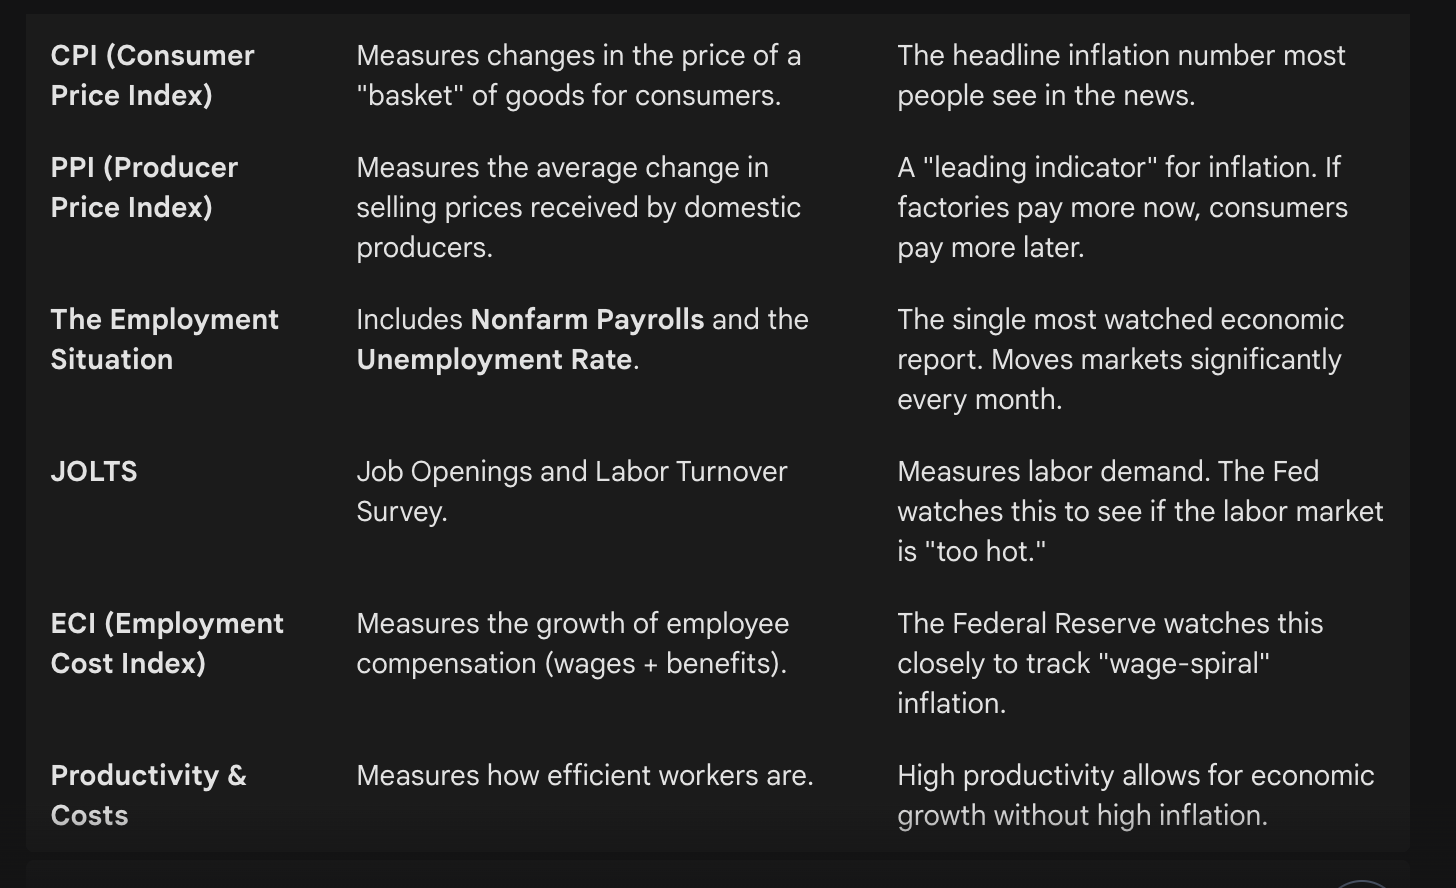

## That for comming from the Bureau of Economic Analysis ##

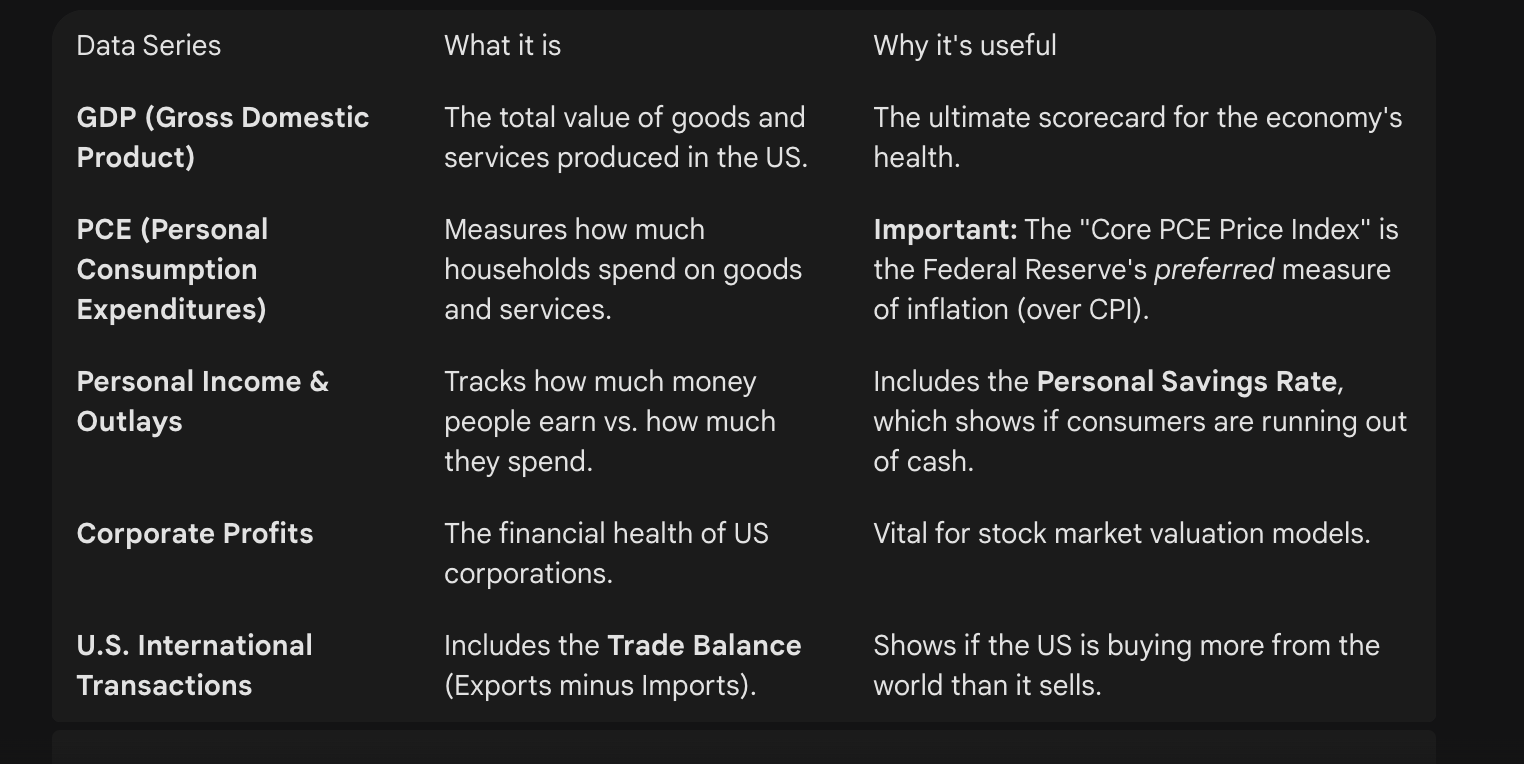

In [ ]:
import pandas_datareader.data as web
import pandas as pd
import datetime

# --------------------------------------------------------------------------
# CONFIGURATION
# --------------------------------------------------------------------------
# 1. Define the Date Range
start_date = datetime.datetime(2001, 1, 1)
end_date = datetime.datetime.now()


# IMPORTANT! CPI is from 1982-1984 So 334.2 means 334.2% from the base period
# 100$ in 1982 means 334.2$ in the data 

# 2. Define the Series IDs (The "Codes" for the data)
# We map the technical ID to a readable name for your table.

bls_indicators = {
    'CPIAUCSL': 'CPI (Inflation)',           # BLS: Consumer Price Index
    'UNRATE':   'Unemployment Rate',         # BLS: Unemployment Rate
    'PAYEMS':   'Nonfarm Payrolls',           # BLS: Total Jobs Added/Lost
    'JTSJOL':   'Total job openings',           # BLS: Measures labor demand.
    'ICSA':     'Initial Claim',               # BLS: Number of people first time filing the unempoyment insurace
    'CIVPART':  'Labor force participation rate', # BLS: The percentage of the population that is looking for work
    'CES0500000003': 'Average hourly Earning'   # BLS : How much wages are growing (Private employees).
}

bea_indicators = {
    'GDP':      'GDP (Billions $)',          # BEA: Gross Domestic Product
    'PCEPI':    'PCE Price Index',           # BEA: Fed's Preferred Inflation
    'PCE':      'Personal Spending',          # BEA: Personal Consumption Expenditures
    'GDPC1':    'Real GDP',                    # BEA: GDP adjusted for inflation
    'INDPRO':   'Industrial Production',       # BEA: Output of factories and utilities
    'RSXFS':    'Retail Sales',                # BEA: Total sales at retail stores (exclude food services)
    'DGORDER':  'Durable Good'                 # BEA: Neww orders for long-lasting manufactured goods ( airplane, appliances)
}

# Combine keys for the API request
all_series_ids = list(bls_indicators.keys()) + list(bea_indicators.keys())

# --------------------------------------------------------------------------
# FETCH DATA
# --------------------------------------------------------------------------
print("Fetching data from FRED (Aggregating BLS and BEA)...")

try:
    # 'fred' is the data source. 
    # Note: For heavy use, you can pass api_key='YOUR_KEY' here.
    df = web.DataReader(all_series_ids, 'fred', start_date, end_date)
    
    # ----------------------------------------------------------------------
    # PROCESS TABLE 1: BUREAU OF LABOR STATISTICS (BLS)
    # ----------------------------------------------------------------------
    # Select only BLS columns and rename them
    df_bls = df[list(bls_indicators.keys())].rename(columns=bls_indicators)
    
    # Drop rows where all data is NaN (clean up calendar alignment)
    df_bls.dropna(how='all', inplace=True)
    
    print("\n--- BLS DATA (Labor & Prices) - Last 5 Months ---")
    print(df_bls.tail())
    
    # ----------------------------------------------------------------------
    # PROCESS TABLE 2: BUREAU OF ECONOMIC ANALYSIS (BEA)
    # ----------------------------------------------------------------------
    # Select only BEA columns and rename them
    df_bea = df[list(bea_indicators.keys())].rename(columns=bea_indicators)
    
    # GDP is Quarterly (happens every 3 months), PCE is Monthly.
    # We forward-fill GDP just to make the table look readable if you want monthly views,
    # OR we just leave it as NaN. Let's keep it pure (NaN is safer).
    df_bea.dropna(how='all', inplace=True)

    print("\n--- BEA DATA (Growth & Spending) - Last 5 Periods ---")
    print(df_bea.tail())

    # ----------------------------------------------------------------------
    # SAVE TO FILES
    # ----------------------------------------------------------------------
    df_bls.to_csv('BLS_Data.csv')
    df_bea.to_csv('BEA_Data.csv')
    print("\nSuccess! Data saved to 'BLS_Data.csv' and 'BEA_Data.csv'")

except Exception as e:
    print(f"An error occurred: {e}")
    print("Tip: If you run this many times, you may need a free FRED API Key.")

Fetching data from FRED (Aggregating BLS and BEA)...

--- BLS DATA (Labor & Prices) - Last 5 Months ---
            CPI (Inflation)  Unemployment Rate  Nonfarm Payrolls  \
DATE                                                               
2025-11-15              NaN                NaN               NaN   
2025-11-22              NaN                NaN               NaN   
2025-11-29              NaN                NaN               NaN   
2025-12-06              NaN                NaN               NaN   
2025-12-13              NaN                NaN               NaN   

            Total job openings  Initial Claim  Labor force participation rate  \
DATE                                                                            
2025-11-15                 NaN       222000.0                             NaN   
2025-11-22                 NaN       217000.0                             NaN   
2025-11-29                 NaN       192000.0                             NaN   
2025-12-06    

In [9]:
import os
import pandas_datareader as pdr


df = pdr.get_data_tiingo('GOOG', api_key = os.getenv('Tiingo_API_Token'))
df.head()

TypeError: concat() takes 1 positional argument but 2 were given